In [1]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from matplotlib import pyplot as plt
from PIL import Image

import re
from collections import Counter

from wordcloud import WordCloud
import pymongo


%matplotlib inline

In [2]:
from util import MONGO_URI
from util import MONGO_DATABASE

In [3]:
client = pymongo.MongoClient(MONGO_URI)
db = client[MONGO_DATABASE]

In [4]:
stop_words = set(stopwords.words("portuguese"))
type(stop_words)

set

In [5]:
cursor = db.projetos.find()
tags = Counter()
tokenizer = RegexpTokenizer(r'\w+')

for item in cursor:
    texto = item.get('problema','')
#     texto = re.sub('Texto publicado com autorização','',texto) # se o tópico a ser analisado for 'diferencial'
    
    token = tokenizer.tokenize(texto)
    for t in token:
        t = t.lower()
        if (t not in stop_words) and (not t.isdigit()) and (len(t) > 1) :
            tags.update([t])
        

In [6]:
len(tags)

16125

In [7]:
import numpy as np
x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

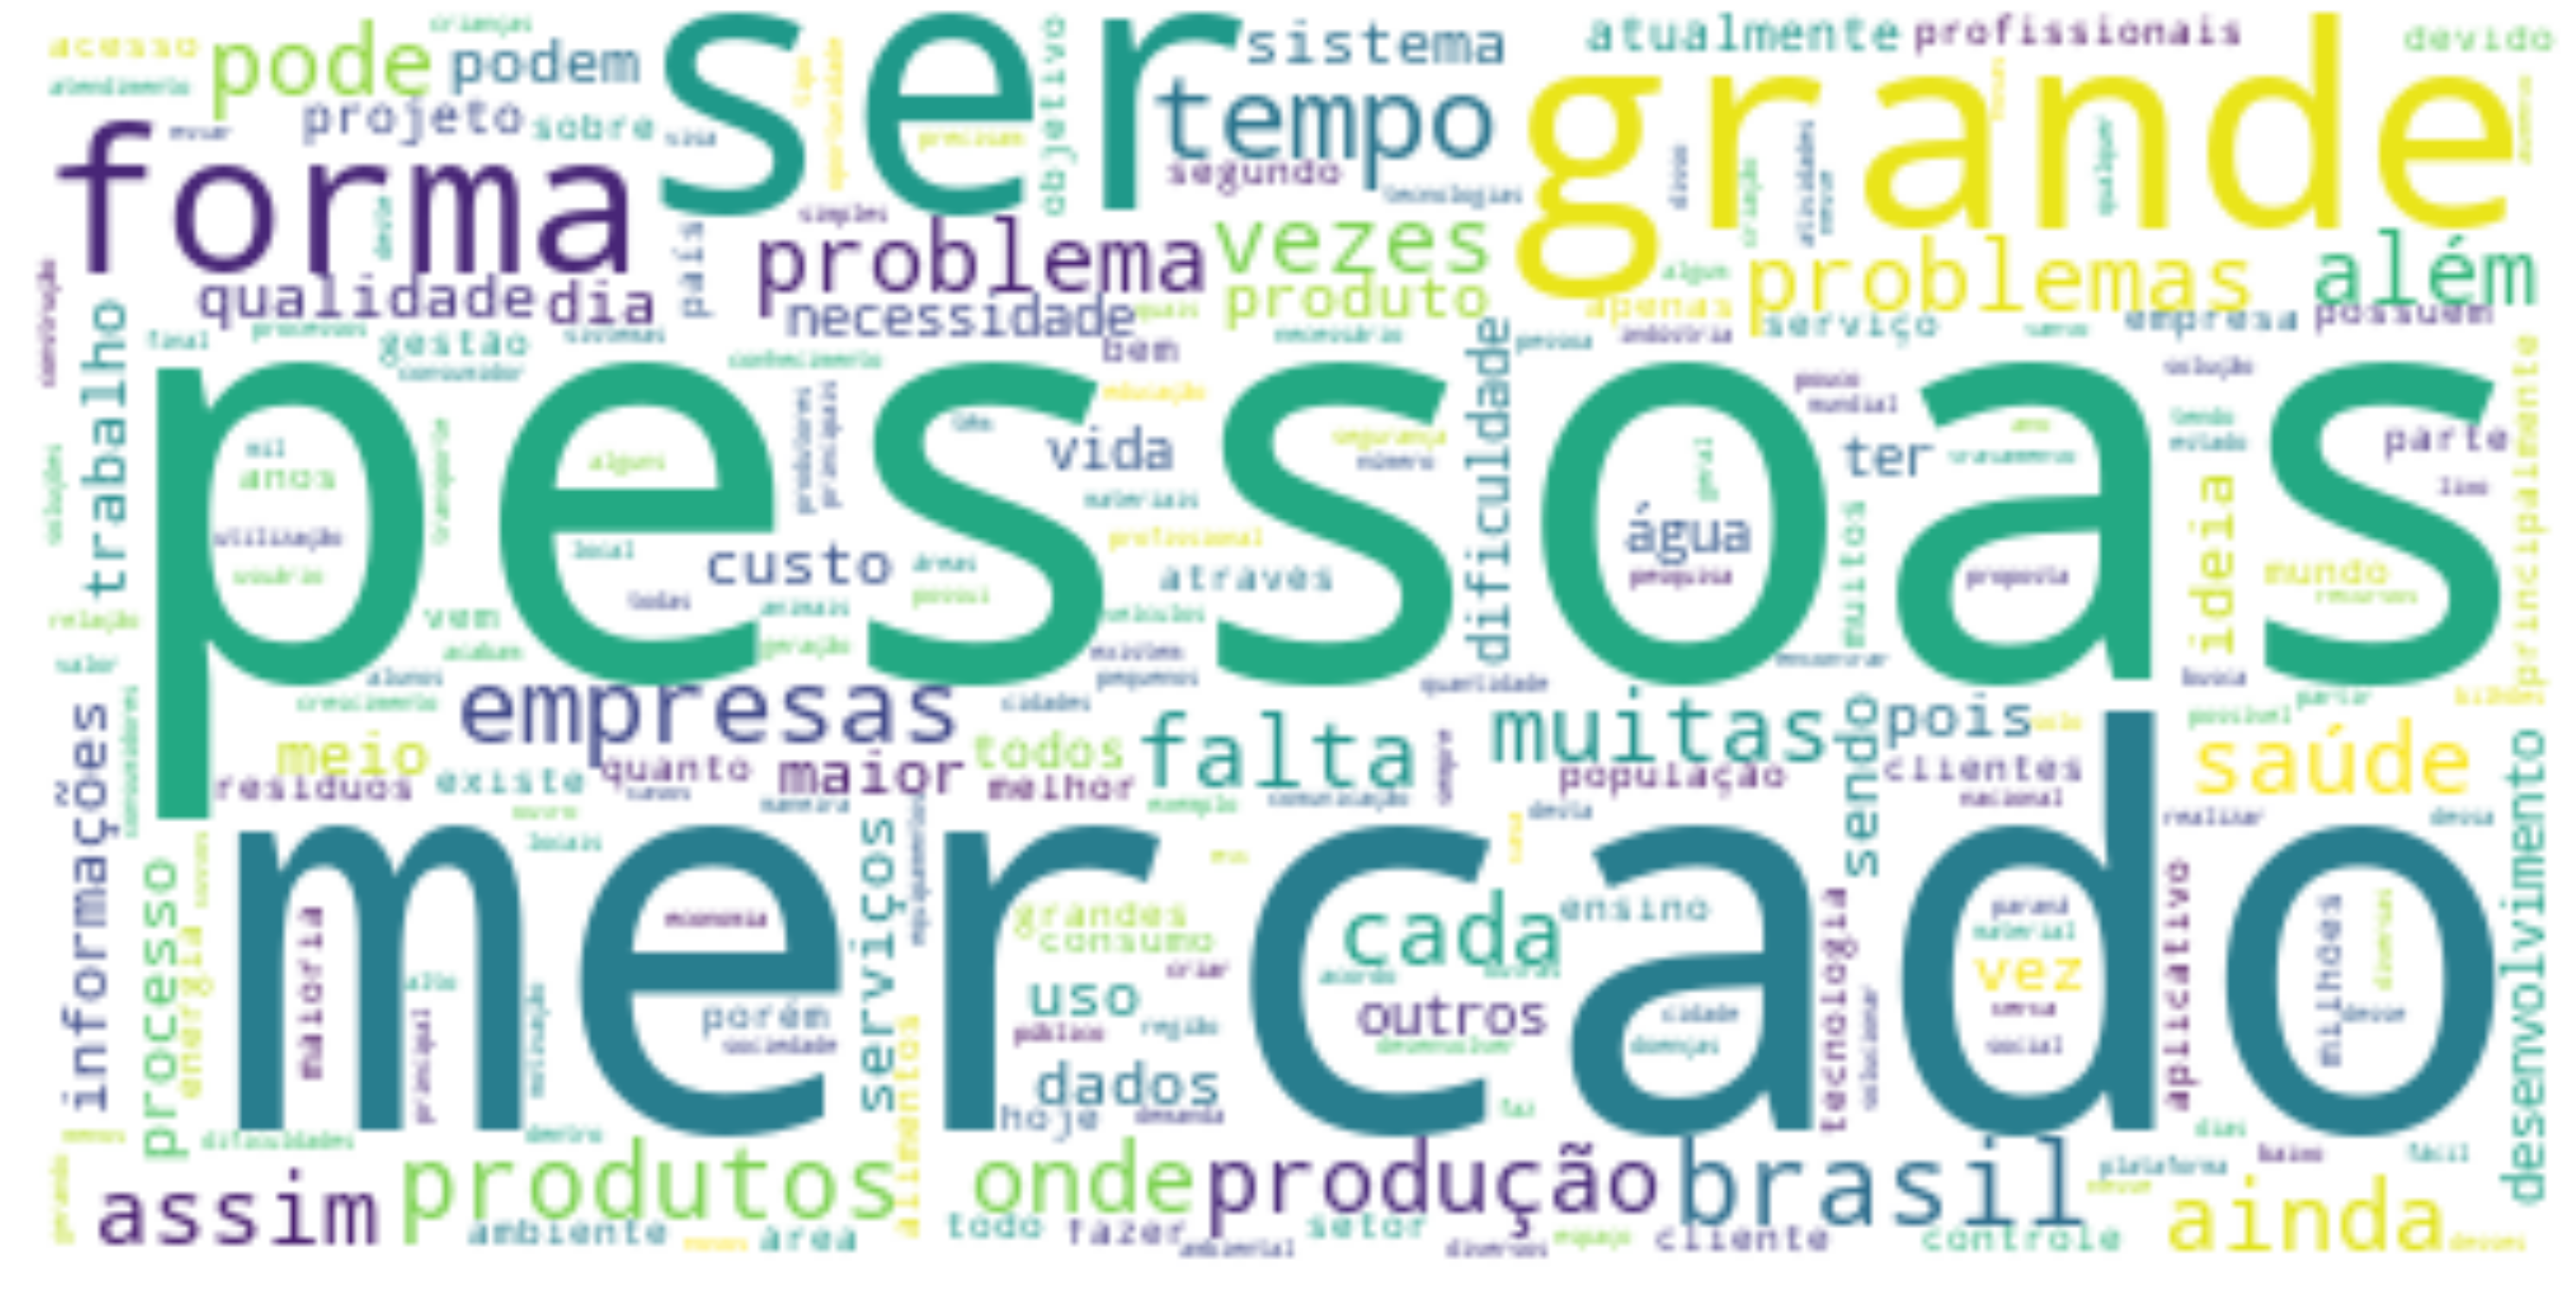

In [8]:
wc = WordCloud(background_color="white", max_words=500)

# generate word cloud
wc.generate_from_frequencies(tags)

# show
plt.figure(figsize=(50,75))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [9]:
tags['pessoas']

678